# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

# Q1 Answers

1. $m(a + bX) = a+b \times m(X)$.

\begin{align*}
m(a+bX) &= \dfrac{1}{N} \sum_{i=1}^N (a + b \times x_i) \\
&= \dfrac{1}{N}(Na + \sum_{i=1}^N b \times x_i) \\
&= a + b(\dfrac{\sum_{i=1}^N x_i}{N}) \\
&= a + b \times m(X)
\end{align*}

2. $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$

\begin{align*}
\text{cov}(x, a+bY) &= \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))((a + by_i) - m(a + bY)) \\
&= \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(a + by_i - a - b \times m(Y)) \\
&= \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(by_i - b \times m(Y)) \\
&= \dfrac{1}{N} \sum_{i=1}^N b(x_i - m(X))(y_i - m(Y)) \\
&= b \times \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y)) \\
&= b \times \text{cov}(X,Y)
\end{align*}

3. Both parts are shown below

- $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $

\begin{align*}
\text{cov}(a+bX,a+bX) &= \dfrac{1}{N} \sum_{i=1}^N ((a + bx_i) - m(a + bX))((a + bx_i) - m(a + bX)) \\
&= \dfrac{1}{N} \sum_{i=1}^N (b(x_i - m(X)))(b(x_i - m(X))) \\
&= \dfrac{1}{N} \sum_{i=1}^N b^2 (x_i - m(X))(x_i - m(X)) \\
&= b^2 \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(x_i - m(X)) \\
&= b^2 \text{cov}(X,X)
\end{align*}

- $\text{cov}(X,X) = s^2 $

\begin{align*}
\text{cov}(X,X) &= \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(x_i - m(X)) \\
&= \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2 = s^2
\end{align*}

4. They should be all the same quartile positions (not the values). Since the transformation is non-decreasing, no value should change whether it's more or less than any other value before and after transformation. Therefore, the values that were part of the median, 25th quartile, IQR, and range should remain as that status despite the transformation.

5. No. Consider the values $X = \{1,2,3\}$. In this case, $m(X) = 2$. However, if we apply $\text{arcsin}(\dfrac{x}{3})$ to the values, we will result with $m(g(X)) \approx 0.8801$. However, $g(m(X)) \approx 0.7297$. Therefore, this is not always true.

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

In [72]:
# PART 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load df
gifts = pd.read_csv('./data/ForeignGifts_edu.csv')
gifts

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
...,...,...,...,...,...,...,...,...,...,...
28216,28217,4279700,Albert Einstein College of Medicine,Bronx,NY,42704,381717,Contract,CHINA,Chia Tai TianQing Pharmaceutical Gr
28217,28218,4279700,Albert Einstein College of Medicine,Bronx,NY,42778,444938,Contract,ISRAEL,BL Oncology Ltd
28218,28219,4279700,Albert Einstein College of Medicine,Bronx,NY,42907,1064580,Contract,ENGLAND,Roche Products Limited
28219,28220,4279700,Albert Einstein College of Medicine,Bronx,NY,42948,737375,Contract,SWITZERLAND,F Hoffman-La Roche Ltd


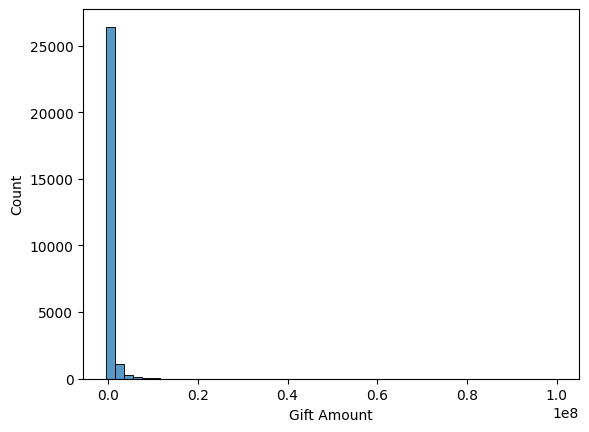

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64


In [73]:
# PART 2
# plot histogram
sns.histplot(gifts['Foreign Gift Amount'], bins=50)
plt.xlabel('Gift Amount')
plt.ylabel('Count')
plt.show()

# describe column
print(gifts['Foreign Gift Amount'].describe())

The overwhelming amount of these values are within the first of 50 (!!) bins in this graph. It therefore looks heavily skewed, espeically accounting for the datapoint of 100,000,000. I also find it interesting that there are negative gifts here?

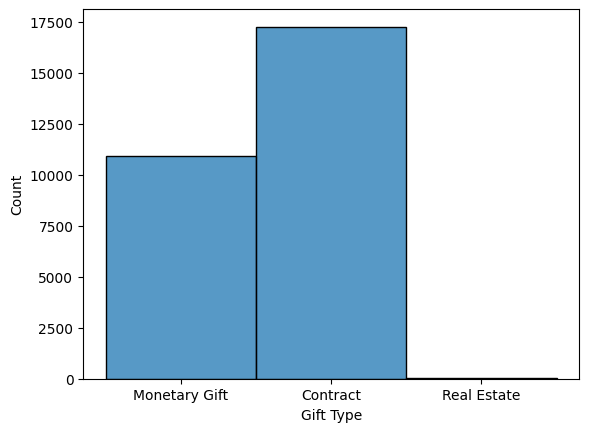

Proportion of gifts that are Monetary: 38.75%
Proportion of gifts that are Contracts: 61.21%
Proportion of gifts that are Real Estate: 0.04%


In [74]:
# PART 3
# plot histogram
sns.histplot(gifts['Gift Type'])
plt.xlabel('Gift Type')
plt.ylabel('Count')
plt.show()

# find proportions
monetary = (gifts['Gift Type'] == "Monetary Gift").mean()
contract = (gifts['Gift Type'] == "Contract").mean()
real_estate = (gifts['Gift Type'] == "Real Estate").mean()

# print proportions
print(f"Proportion of gifts that are Monetary: {monetary:.2%}")
print(f"Proportion of gifts that are Contracts: {contract:.2%}")
print(f"Proportion of gifts that are Real Estate: {real_estate:.2%}")

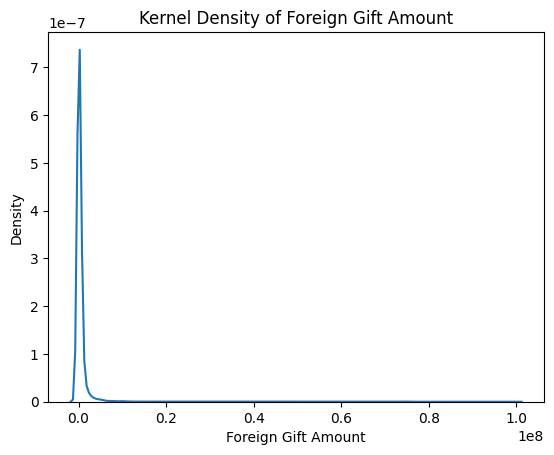

In [75]:
# PART 4
sns.kdeplot(gifts['Foreign Gift Amount']);
plt.title('Kernel Density of Foreign Gift Amount')
plt.show()

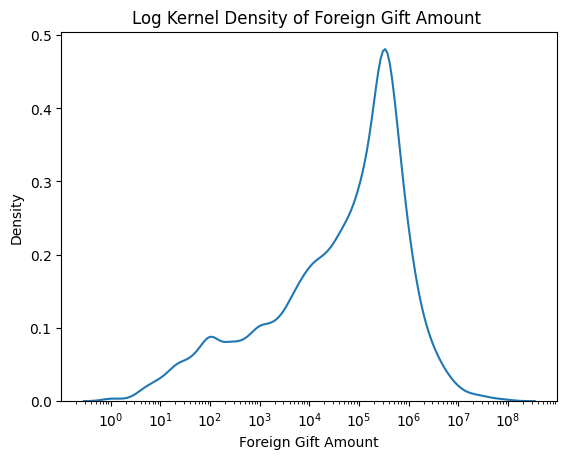

In [76]:
sns.kdeplot(gifts['Foreign Gift Amount'], log_scale=True);
plt.title('Log Kernel Density of Foreign Gift Amount ')
plt.show()

In terms of patterns, it looks like the log graph is a lot more readable and interpretable. There is just one large spike in the originial, but the log gives a more sparse distribution of our data.

In [77]:
# PART 5
# find top 15 by count
top = gifts.groupby('Country of Giftor').count().sort_values(by='Foreign Gift Amount', ascending=False).head(15)

# print results
print("Top 15 Countries with Most Gifts")
for i, (country, _) in enumerate(top.iterrows()):
    print(f"{i+1}. {country}")

Top 15 Countries with Most Gifts
1. ENGLAND
2. CHINA
3. CANADA
4. JAPAN
5. SWITZERLAND
6. SAUDI ARABIA
7. FRANCE
8. GERMANY
9. HONG KONG
10. SOUTH KOREA
11. QATAR
12. THE NETHERLANDS
13. KOREA
14. INDIA
15. TAIWAN


In [78]:
# find top 15 by total
top = gifts.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

# print results
print("Top 15 Schools with Highest Gift Totals")
for i, country in enumerate(top.index):
    print(f"{i+1}. {country}")

Top 15 Schools with Highest Gift Totals
1. QATAR
2. ENGLAND
3. CHINA
4. SAUDI ARABIA
5. BERMUDA
6. CANADA
7. HONG KONG
8. JAPAN
9. SWITZERLAND
10. INDIA
11. GERMANY
12. UNITED ARAB EMIRATES
13. FRANCE
14. SINGAPORE
15. AUSTRALIA


Top 15 Schools with Most Gifts
1. Carnegie Mellon University
2. Cornell University
3. Harvard University
4. Massachusetts Institute of Technology
5. Yale University
6. Texas A&M University
7. Johns Hopkins University
8. Northwestern University
9. Georgetown University
10. University of Chicago (The)
11. University of Colorado Boulder
12. Duke University
13. Brigham Young University
14. Stanford University
15. University of Texas MD Anderson Cancer Center


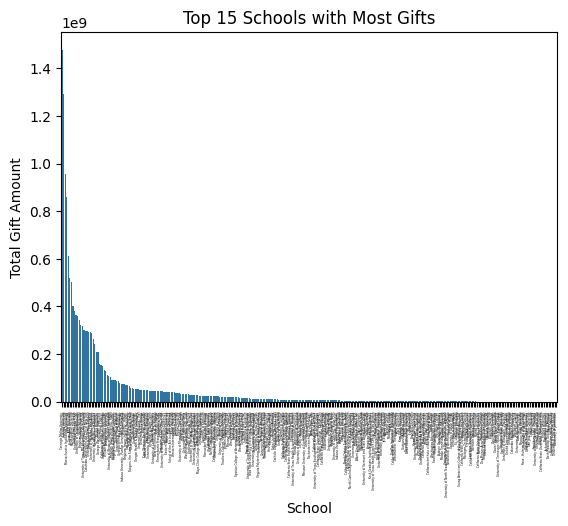

In [79]:
# PART 6
# find top 15
top = gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False)

# print results
print("Top 15 Schools with Most Gifts")
for i, school in enumerate(top.head(15).index):
    print(f"{i+1}. {school}")

# plot 
sns.barplot(x=top.index, y=top.values)
plt.title('Top 15 Schools with Most Gifts')
plt.xlabel('School')
plt.xticks(rotation=90, fontsize=2)
plt.ylabel('Total Gift Amount')
plt.show()

Since this doesn't seem readable, here is the top 15 instead of all institutions.

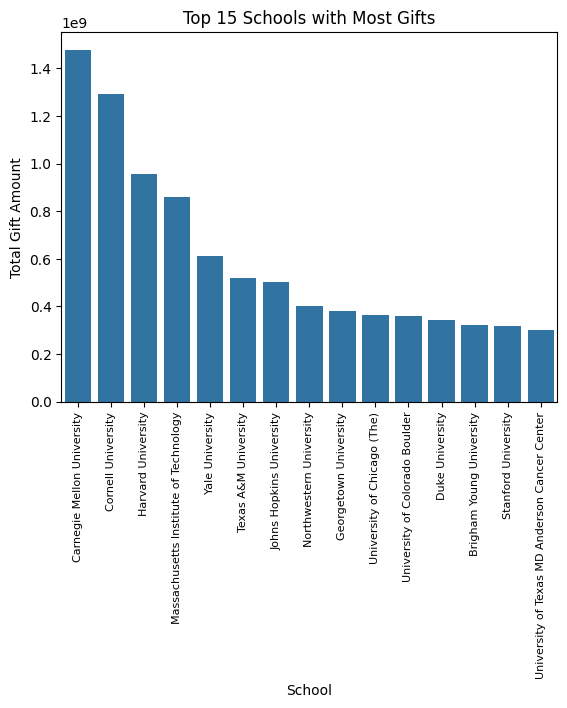

In [80]:
# plot top 15
top = top.head(15)
sns.barplot(x=top.index, y=top.values)
plt.title('Top 15 Schools with Most Gifts')
plt.xlabel('School')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Total Gift Amount')
plt.show()

In [81]:
# PART 7
# find top 15 donors
top = gifts.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False)

# print results
print("Top 15 Giftors by Total")
for i, giftor in enumerate(top.head(15).index):
    print(f"{i+1}. {giftor}")

Top 15 Giftors by Total
1. Qatar Foundation
2. Qatar Foundation/Qatar National Res
3. Qatar Foundation for Education
4. Anonymous
5. Saudi Arabian Cultural Mission
6. HCL
7. Church of Jesus Christ of LDS
8. Emirates Institute for Advanced Sc
9. QIC
10. Anonymous #9
11. Qatar National Research Fund
12. Government of Saudi Arabia
13. Contracting Party
14. CMKL University
15. Royal Embassy of Saudi Arabia


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [82]:
# PART 1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load df
rigs = pd.read_csv('./data/drilling_rigs.csv')
rigs

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991
...,...,...,...,...,...,...,...,...,...,...
618,2024 July,564,22,479,101,519,49,18,586,Not Available
619,2024 August,566,19,483,97,521,48,16,586,Not Available
620,2024 September,567,20,486,97,522,50,15,587,Not Available
621,2024 October,568,18,481,101,517,53,15,585,Not Available


In [83]:
# finds values of a specific to column to see if they're ints or strings
rigs['Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)'].unique()

array(['Not Available', '626', '713', '727', '746', '663', '575', '582',
       '567', '562', '554', '568', '565', '512', '518', '490', '507',
       '455', '392', '407', '427', '431', '423', '432', '437', '460',
       '493', '532', '541', '514', '492', '478', '484', '498', '497',
       '506', '566', '588', '615', '643', '633', '564', '520', '469',
       '430', '483', '472', '451', '433', '457', '400', '378', '381',
       '370', '358', '343', '349', '334', '345', '418', '397', '335',
       '311', '315', '320', '323', '350', '368', '441', '453', '425',
       '356', '337', '314', '331', '341', '325', '342', '361', '354',
       '326', '322', '328', '301', '327', '333', '332', '330', '295',
       '283', '286', '288', '298', '290', '297', '363', '377', '373',
       '379', '396', '382', '409', '390', '380', '291', '272', '267',
       '264', '226', '215', '214', '190', '155', '125', '117', '114',
       '136', '124', '108', '111', '130', '137', '145', '161', '143',
       '147', '17

623 Operations with 10 variables. Columns that count the number of onshore rigs, offshore rigs, and total rigs are the only ones where the data are integers. The other columns, though they have integer values, are strings due to the `'Not Avaiable'` tag. We'll have to convert all of these to `np.nan` in order to succesfully convert these columns to integers.

In [84]:
# clean table
rigs = rigs.replace('Not Available', np.nan)
numeric_columns = rigs.columns[1:] # get columns to clean
rigs[numeric_columns] = rigs[numeric_columns].apply(pd.to_numeric, errors='coerce') # convert to int
rigs

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,NaN,NaN,NaN,NaN,NaN,1219,1549.0
1,1973 February,1037,89,NaN,NaN,NaN,NaN,NaN,1126,1677.0
2,1973 March,959,90,NaN,NaN,NaN,NaN,NaN,1049,1805.0
3,1973 April,914,79,NaN,NaN,NaN,NaN,NaN,993,1898.0
4,1973 May,974,72,NaN,NaN,NaN,NaN,NaN,1046,1991.0
...,...,...,...,...,...,...,...,...,...,...
618,2024 July,564,22,479.0,101.0,519.0,49.0,18.0,586,NaN
619,2024 August,566,19,483.0,97.0,521.0,48.0,16.0,586,NaN
620,2024 September,567,20,486.0,97.0,522.0,50.0,15.0,587,NaN
621,2024 October,568,18,481.0,101.0,517.0,53.0,15.0,585,NaN


In [85]:
# PART 2
# use provided function to convert 'Month' to datetime
rigs['time'] = pd.to_datetime(rigs['Month'], format='mixed')
rigs

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs),time
0,1973 January,1120,99,NaN,NaN,NaN,NaN,NaN,1219,1549.0,1973-01-01
1,1973 February,1037,89,NaN,NaN,NaN,NaN,NaN,1126,1677.0,1973-02-01
2,1973 March,959,90,NaN,NaN,NaN,NaN,NaN,1049,1805.0,1973-03-01
3,1973 April,914,79,NaN,NaN,NaN,NaN,NaN,993,1898.0,1973-04-01
4,1973 May,974,72,NaN,NaN,NaN,NaN,NaN,1046,1991.0,1973-05-01
...,...,...,...,...,...,...,...,...,...,...,...
618,2024 July,564,22,479.0,101.0,519.0,49.0,18.0,586,NaN,2024-07-01
619,2024 August,566,19,483.0,97.0,521.0,48.0,16.0,586,NaN,2024-08-01
620,2024 September,567,20,486.0,97.0,522.0,50.0,15.0,587,NaN,2024-09-01
621,2024 October,568,18,481.0,101.0,517.0,53.0,15.0,585,NaN,2024-10-01


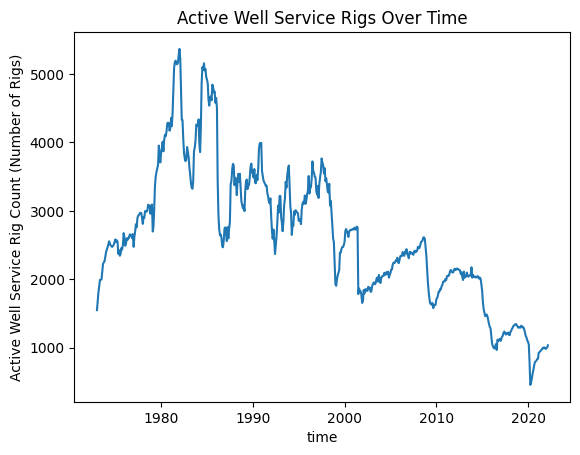

In [86]:
# PART 3
# plot lineplot
sns.lineplot(data=rigs, x='time', y='Active Well Service Rig Count (Number of Rigs)')
plt.title('Active Well Service Rigs Over Time')
plt.show()

Looks like a consistent up and down pattern throughout each decade. Overall, there is a trend downwards despite theses fluctuations. There was over 5000 active at it's peak in the mid 1980s, but is currently at around 1000.

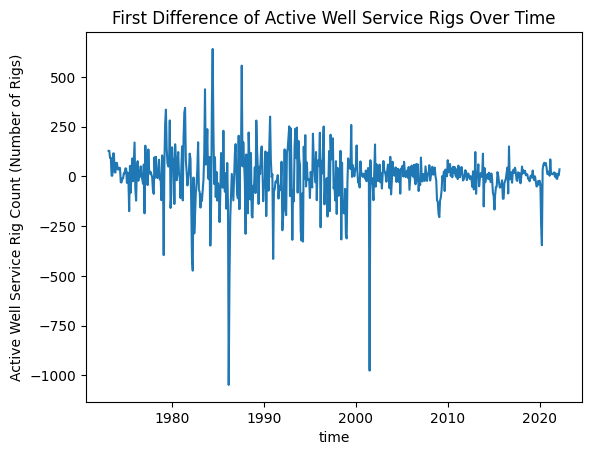

In [87]:
# PART 4
# Compute the first difference of `Active Well Service Rig Count (Number of Rigs)`
rigs['Active Well Service Rig Count (Number of Rigs)'] = rigs['Active Well Service Rig Count (Number of Rigs)'].diff()

# Plot the first difference over time
sns.lineplot(data=rigs, x='time', y='Active Well Service Rig Count (Number of Rigs)')
plt.title('First Difference of Active Well Service Rigs Over Time')
plt.show()


We can draw similar conclusions to the lineplot before. This shows the drastic decreases from the late 1850s and early 2000s, but since the latter, the changes have steadied. Fluctaions were a lot more dramatic beforehand.

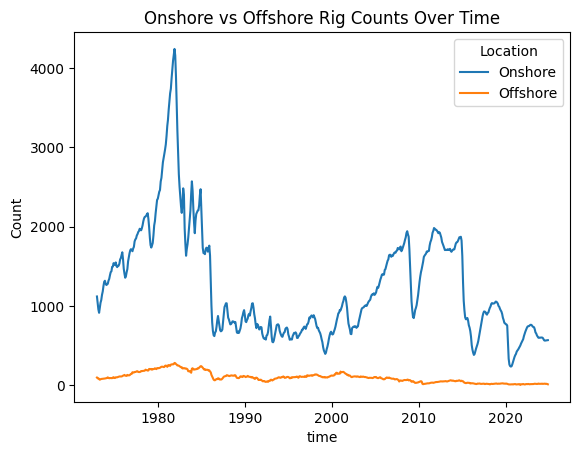

In [88]:
# PART 5
# get columns that will be melted
columns_to_melt = [
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'
]

# melt columns
rigs_melted = pd.melt(
    rigs,
    id_vars=['time'],
    value_vars=columns_to_melt,
    var_name='Location',
    value_name='Count'
)

# rename for simplicity
rigs_melted['Location'] = rigs_melted['Location'].map({
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)': 'Onshore',
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)': 'Offshore'
})

# plot data
sns.lineplot(data=rigs_melted, x='time', y='Count', hue='Location')
plt.title('Onshore vs Offshore Rig Counts Over Time')
plt.show()